In [10]:
import pandas as pd

accidents=pd.read_csv("./etiq-roadsense/accidents_train.csv")
places=pd.read_csv("./etiq-roadsense/places_train.csv")
users=pd.read_csv("./etiq-roadsense/users_train.csv")
vehicles=pd.read_csv("./etiq-roadsense/vehicles_train.csv")

In [11]:
print(accidents.head())
print(places.head())
print(users.head())
print(vehicles.head())

     AccidentId    Gravity         Date         Hour           Light  \
0  201800000001  NonLethal   24/01/2018     15:05:00        daylight   
1  201800000002  NonLethal  Feb 12 2018     10:15:00        Daylight   
2  201800000003  NonLethal    04-Mar-18  11:35:00:20        daylight   
3  201800000004  NonLethal  May 05 2018      5:35 PM        DAYLIGHT   
4  201800000006        NaN    23-Sep-18  06:30:00:58  TwilightOrDawn   

   Department  Commune InAgglomeration IntersectionType    Weather  \
0         590        5              No           Y-type     Normal   
1         590       11             Yes           Square   VERYGOOD   
2         590      477             Yes           T-type     Normal   
3         590       52             Yes   NoIntersection   VERYGOOD   
4         590       52             Yes   NoIntersection  LightRain   

                      CollisionType             PostalAddress GPSCode  \
0  2Vehicles-BehindVehicles-Frontal    route des Ansereuilles       M   


In [34]:
vehicles.head()

,AccidentId,VehicleId,Direction,Category,PassengerNumber,FixedObstacle,MobileObstacle,ImpactPoint,Maneuver
0,201800000001,V01,Unk,Car<=3.5T,0,NaN,Vehicle,Front Right,Turning Left
1,201800000001,Car_01,?,Car<=3.5T,0,NaN,Blue Ford,LeftFront,NoDirectionChange
2,201800000002,V01,Unk,Car<=3.5T,0,NaN,Pedestrian,NaN,NoDirectionChange
3,201800000003,α01,?,Motorbike>125cm3,0,StationaryVehicle,Blue Ford,Front,NoDirectionChange
4,201800000003,B01,Unknown,Car<=3.5T,0,NaN,Vehicle,LeftSide,Virage Gauche


In [29]:
accidents['Light_clean'] = accidents['Light'].str.upper().str.strip()

# On définit un mapping pour regrouper les synonymes
mapping = {
    'DAYLIGHT': 'Daylight',
    'TWILIGHTORDAWN': 'TwilightOrDawn',
    'NIGHTSTREELIGHTSON': 'NightStreetLightsOn',
    'NIGHTNOSTREETLIGHT': 'NightNoStreetLight',
    'NIGHTSTREELIGHTSOFF': 'NightStreetLightsOff'
}

accidents['Light_clean'] = accidents['Light_clean'].replace(mapping)

print(accidents['Light_clean'].unique())
print(accidents['Gravity'].unique())


['Daylight' 'TwilightOrDawn' 'NightStreetLightsOn' 'NightNoStreetLight'
 'NightStreetLightsOff']
['NonLethal' nan 'Lethal']


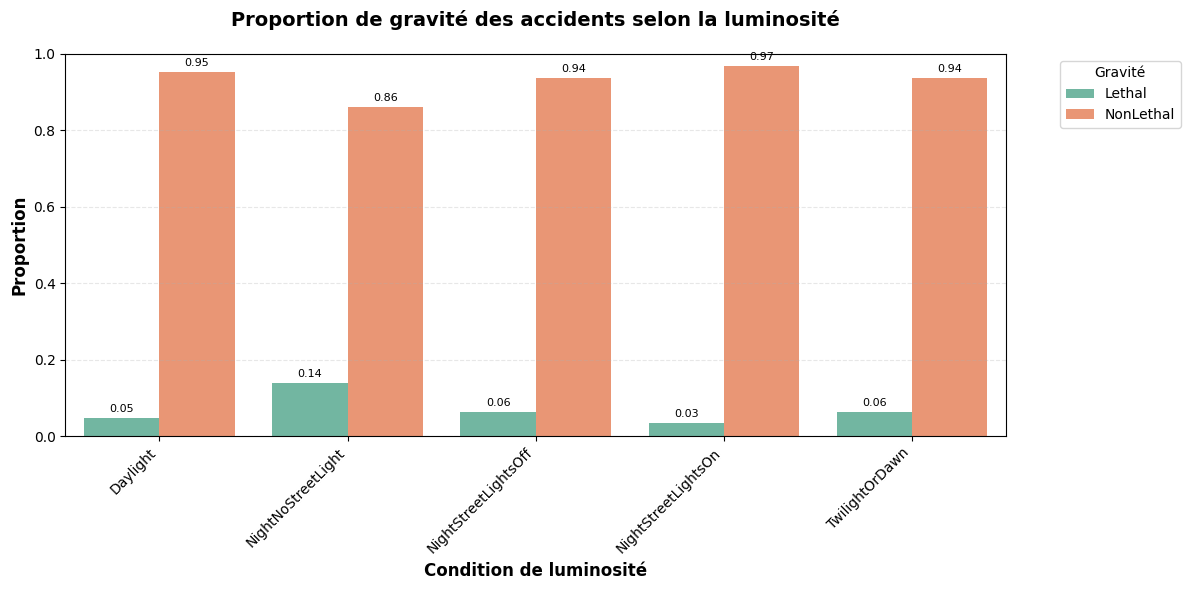

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimer les lignes avec des NaN dans Light_clean ou Gravity
accidents_clean = accidents.dropna(subset=['Light_clean', 'Gravity'])

# Calculer les proportions de gravité pour chaque condition de luminosité
prop = (
    accidents_clean.groupby(['Light_clean', 'Gravity'])
    .size()
    .unstack(fill_value=0)
)

# Calculer les proportions en divisant par le total de chaque ligne
prop = prop.div(prop.sum(axis=1), axis=0)

# Remettre en format long pour seaborn
prop = prop.stack().reset_index()
prop.columns = ['Light_clean', 'Gravity', 'Proportion']

# Créer le graphique avec une meilleure mise en page
plt.figure(figsize=(12, 6))
sns.barplot(data=prop, x='Light_clean', y='Proportion', hue='Gravity', palette='Set2')

# Améliorer la lisibilité
plt.xlabel('Condition de luminosité', fontsize=12, fontweight='bold')
plt.ylabel('Proportion', fontsize=12, fontweight='bold')
plt.title('Proportion de gravité des accidents selon la luminosité', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gravité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, 1)

# Ajouter les valeurs sur les barres
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', padding=3, fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\dgold\AppData\Local\Temp\ipykernel_44552\774927269.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_clean['Date_parsed'] = pd.to_datetime(accidents_clean['Date'], errors='coerce', dayfirst=True)
C:\Users\dgold\AppData\Local\Temp\ipykernel_44552\774927269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_clean['Month'] = accidents_clean['Date_parsed'].dt.month
C:\Users\dgold\AppData\Local\Temp\ipykernel_44552\774927269.py:14: SettingWithCopyWarning: 
A value is trying to b

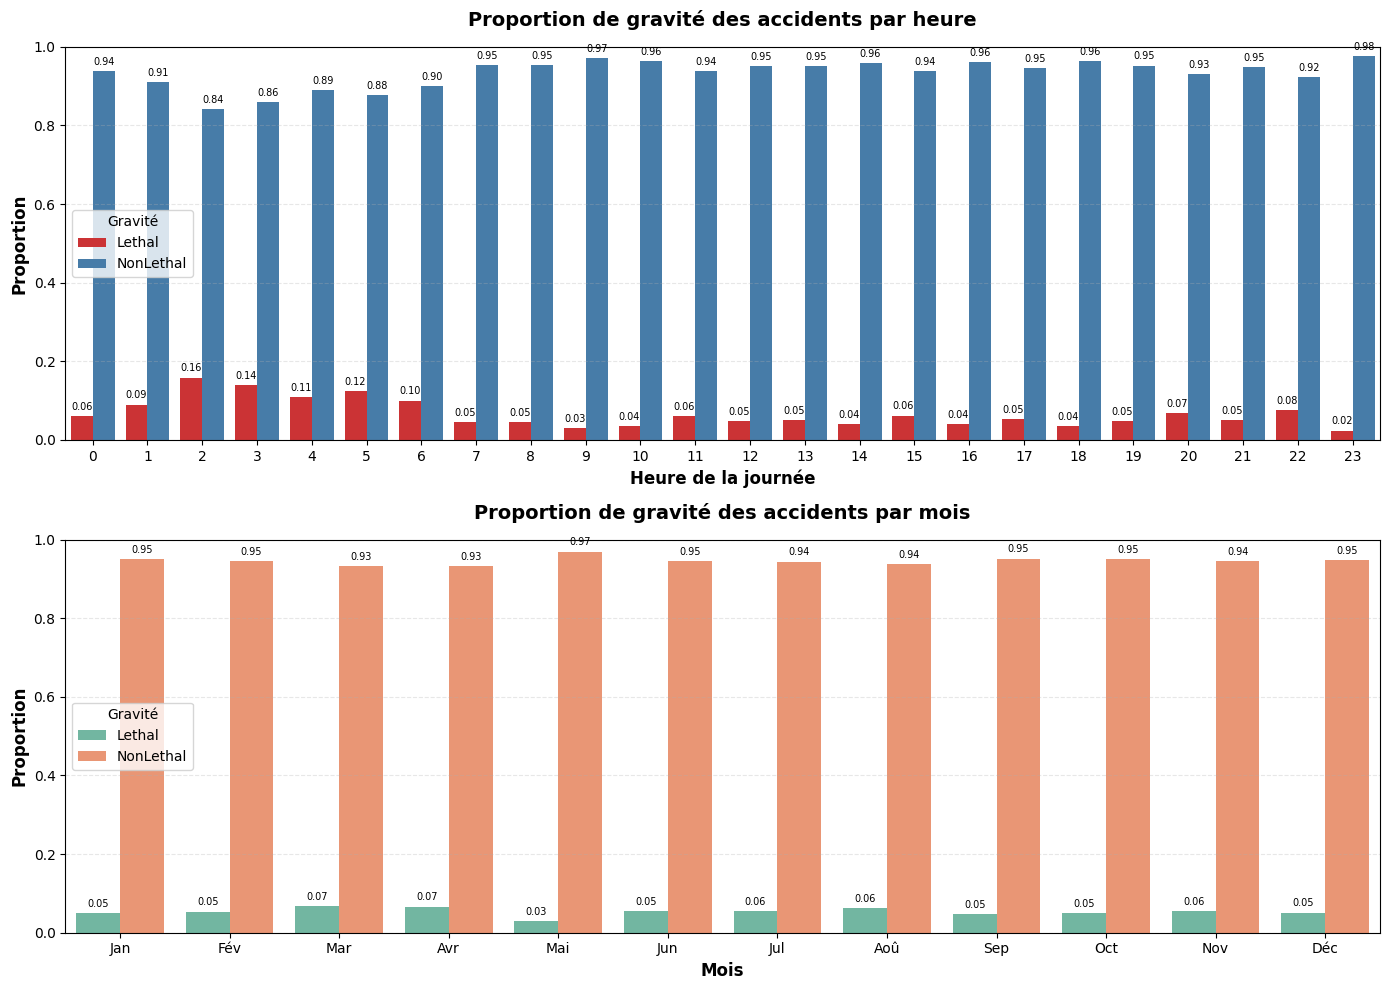


=== Statistiques par heure ===
Heure avec le plus d'accidents: 17.0h (520 accidents)

=== Statistiques par mois ===
Mois avec le plus d'accidents: Mois 6.0 (609 accidents)

Nombre total d'accidents analysés: 5936


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer les NaN
accidents_clean = accidents.dropna(subset=['Date', 'Hour', 'Gravity'])

# Extraire le mois et l'heure
# Convertir la colonne Date en datetime (gérer différents formats)
accidents_clean['Date_parsed'] = pd.to_datetime(accidents_clean['Date'], errors='coerce', dayfirst=True)
accidents_clean['Month'] = accidents_clean['Date_parsed'].dt.month

# Extraire l'heure (prendre les premiers caractères avant ':')
accidents_clean['Hour_num'] = pd.to_datetime(accidents_clean['Hour'], format='%H:%M:%S', errors='coerce').dt.hour
# Si le format ne marche pas, essayer d'autres formats
accidents_clean['Hour_num'] = accidents_clean['Hour_num'].fillna(
    pd.to_datetime(accidents_clean['Hour'], format='%H:%M', errors='coerce').dt.hour
)

# Supprimer les lignes où l'extraction a échoué
accidents_clean = accidents_clean.dropna(subset=['Month', 'Hour_num'])

# Créer une figure avec 2 sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ===== Graphique 1: Proportion d'accidents par heure =====
prop_hour = (
    accidents_clean.groupby(['Hour_num', 'Gravity'])
    .size()
    .unstack(fill_value=0)
)
prop_hour = prop_hour.div(prop_hour.sum(axis=1), axis=0)
prop_hour = prop_hour.stack().reset_index()
prop_hour.columns = ['Hour_num', 'Gravity', 'Proportion']

sns.barplot(data=prop_hour, x='Hour_num', y='Proportion', hue='Gravity', 
            ax=axes[0], palette='Set1')
axes[0].set_xlabel('Heure de la journée', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Proportion', fontsize=12, fontweight='bold')
axes[0].set_title('Proportion de gravité des accidents par heure', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xticks(range(0, 24))
axes[0].set_xticklabels(range(0, 24))
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].legend(title='Gravité', fontsize=10)
axes[0].set_ylim(0, 1)

# ===== Graphique 2: Proportion d'accidents par mois =====
prop_month = (
    accidents_clean.groupby(['Month', 'Gravity'])
    .size()
    .unstack(fill_value=0)
)
prop_month = prop_month.div(prop_month.sum(axis=1), axis=0)
prop_month = prop_month.stack().reset_index()
prop_month.columns = ['Month', 'Gravity', 'Proportion']

# Noms des mois pour l'affichage
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']

sns.barplot(data=prop_month, x='Month', y='Proportion', hue='Gravity', 
            ax=axes[1], palette='Set2')
axes[1].set_xlabel('Mois', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Proportion', fontsize=12, fontweight='bold')
axes[1].set_title('Proportion de gravité des accidents par mois', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xticklabels(month_names)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].legend(title='Gravité', fontsize=10)
axes[1].set_ylim(0, 1)

# Ajouter les valeurs sur les barres
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=7)

plt.tight_layout()
plt.show()

# Afficher quelques statistiques
print("\n=== Statistiques par heure ===")
hour_counts = accidents_clean.groupby('Hour_num').size()
print(f"Heure avec le plus d'accidents: {hour_counts.idxmax()}h ({hour_counts.max()} accidents)")

print("\n=== Statistiques par mois ===")
month_counts = accidents_clean.groupby('Month').size()
print(f"Mois avec le plus d'accidents: Mois {month_counts.idxmax()} ({month_counts.max()} accidents)")
print(f"\nNombre total d'accidents analysés: {len(accidents_clean)}")

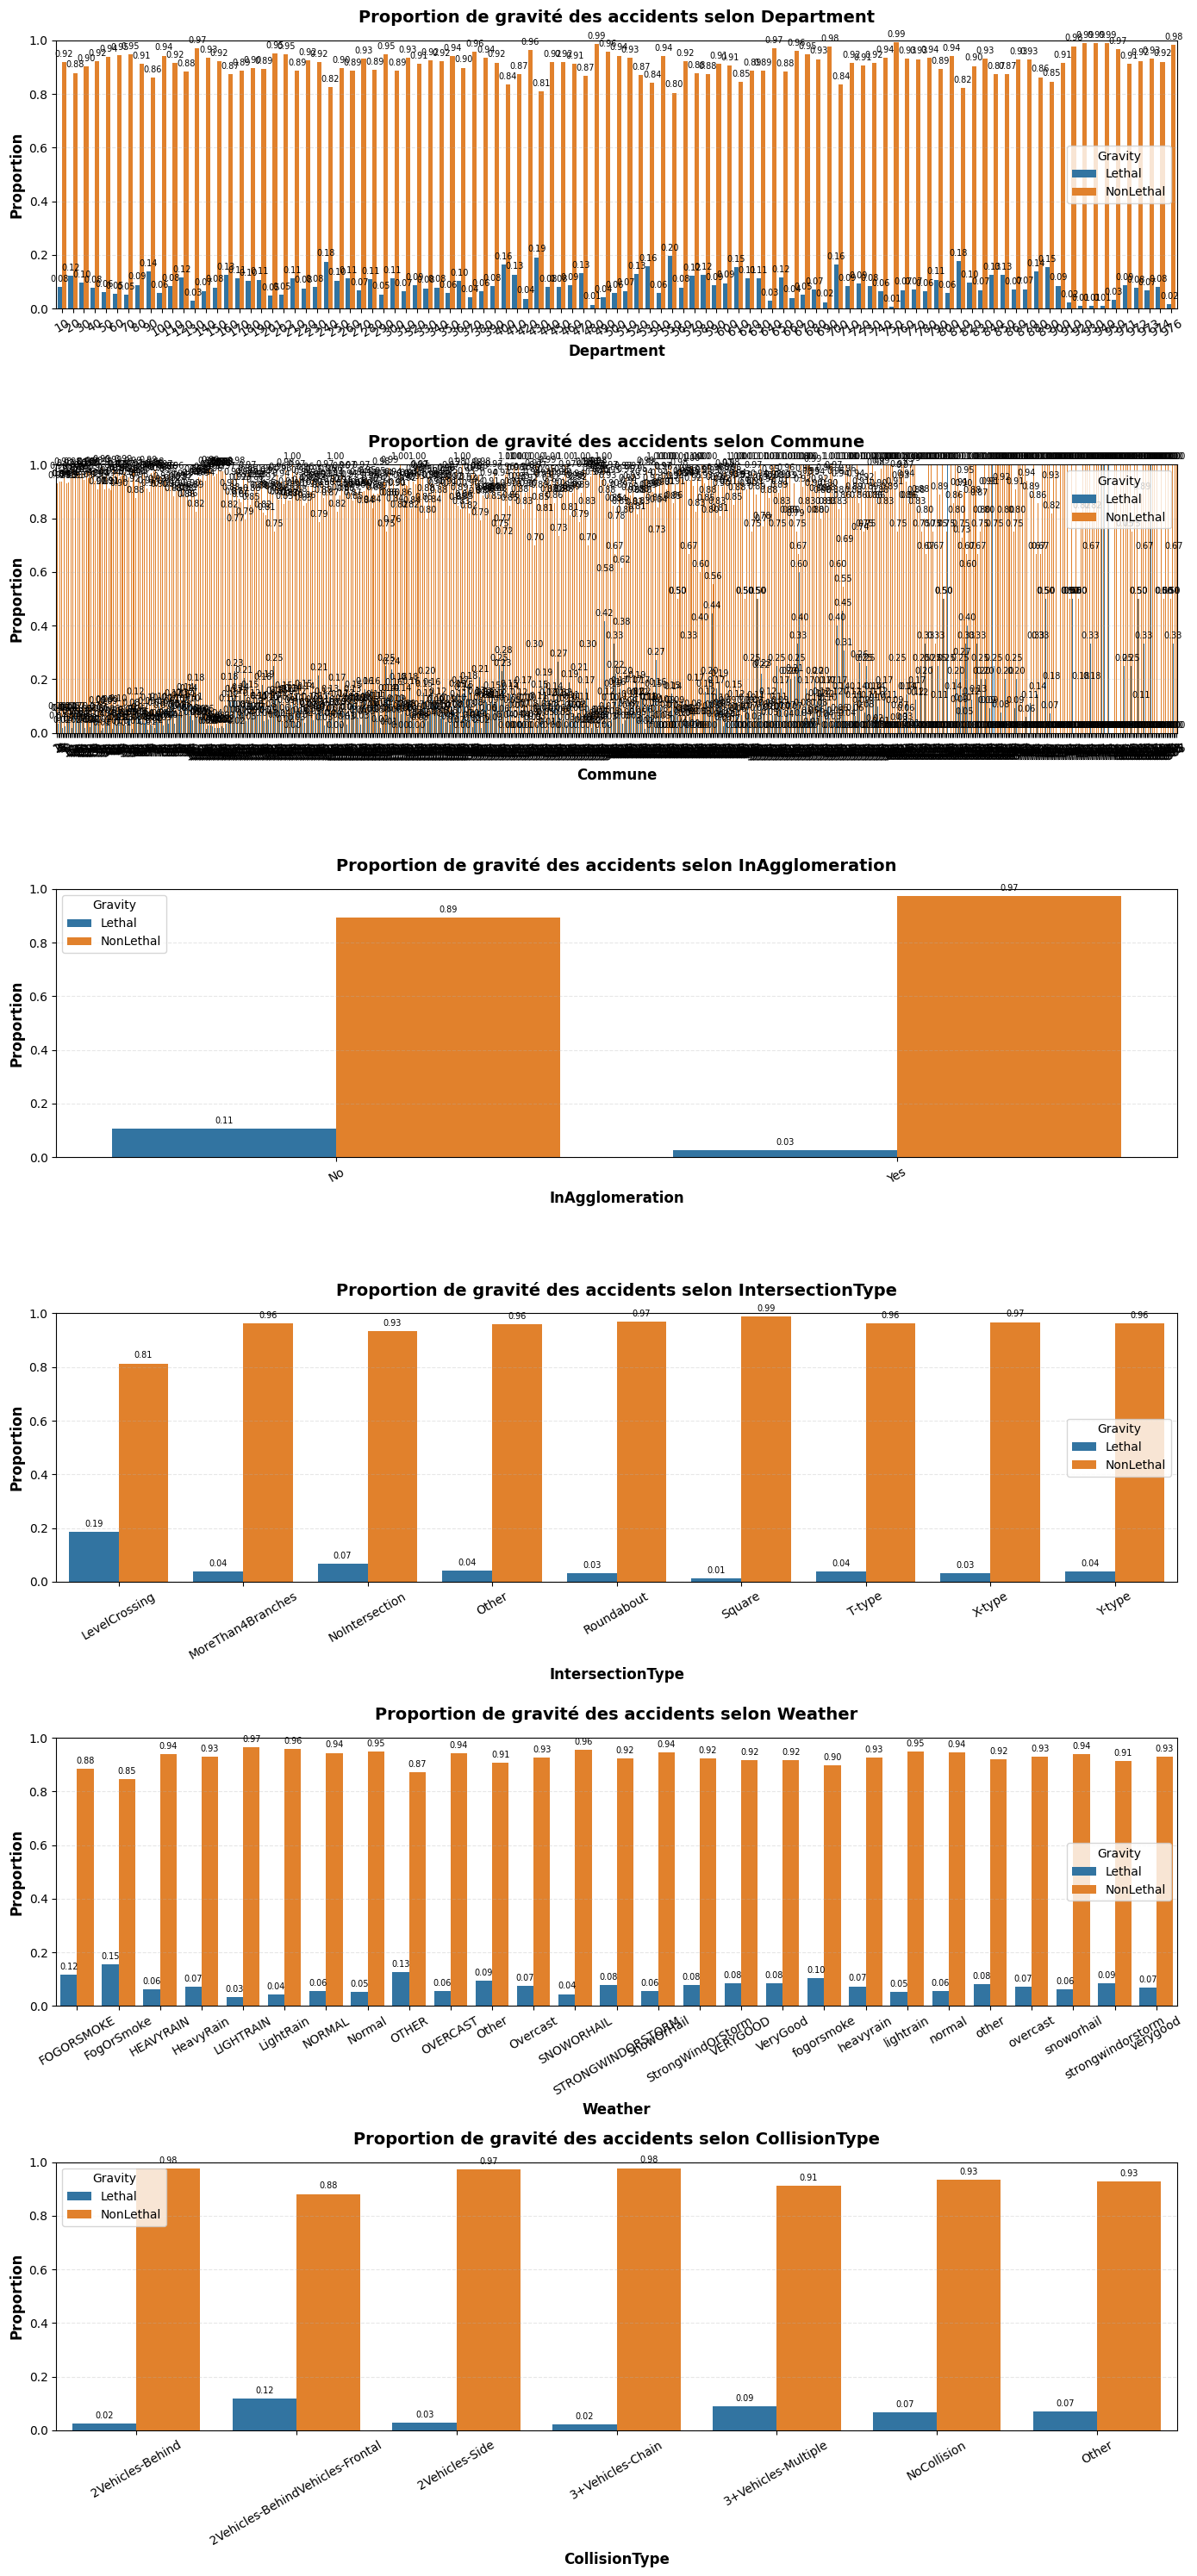

In [33]:

merged = accidents.merge(places, on='AccidentId', how='left')
merged = merged.dropna(subset=['Gravity'])

cols = ['Department', 'Commune', 'InAgglomeration', 'IntersectionType', 'Weather', 'CollisionType']

fig, axes = plt.subplots(len(cols), 1, figsize=(14, 5 * len(cols)))

for i, c in enumerate(cols):
    prop = (
        merged.groupby([c, 'Gravity'])
        .size()
        .unstack(fill_value=0)
    )
    prop = prop.div(prop.sum(axis=1), axis=0)
    prop = prop.stack().reset_index()
    prop.columns = [c, 'Gravity', 'Proportion']
    sns.barplot(data=prop, x=c, y='Proportion', hue='Gravity', ax=axes[i])
    axes[i].set_title(f'Proportion de gravité des accidents selon {c}', fontsize=14, fontweight='bold', pad=15)
    axes[i].set_xlabel(c, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Proportion', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')
    axes[i].set_ylim(0, 1)
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f', padding=3, fontsize=7)

plt.tight_layout()
plt.show()


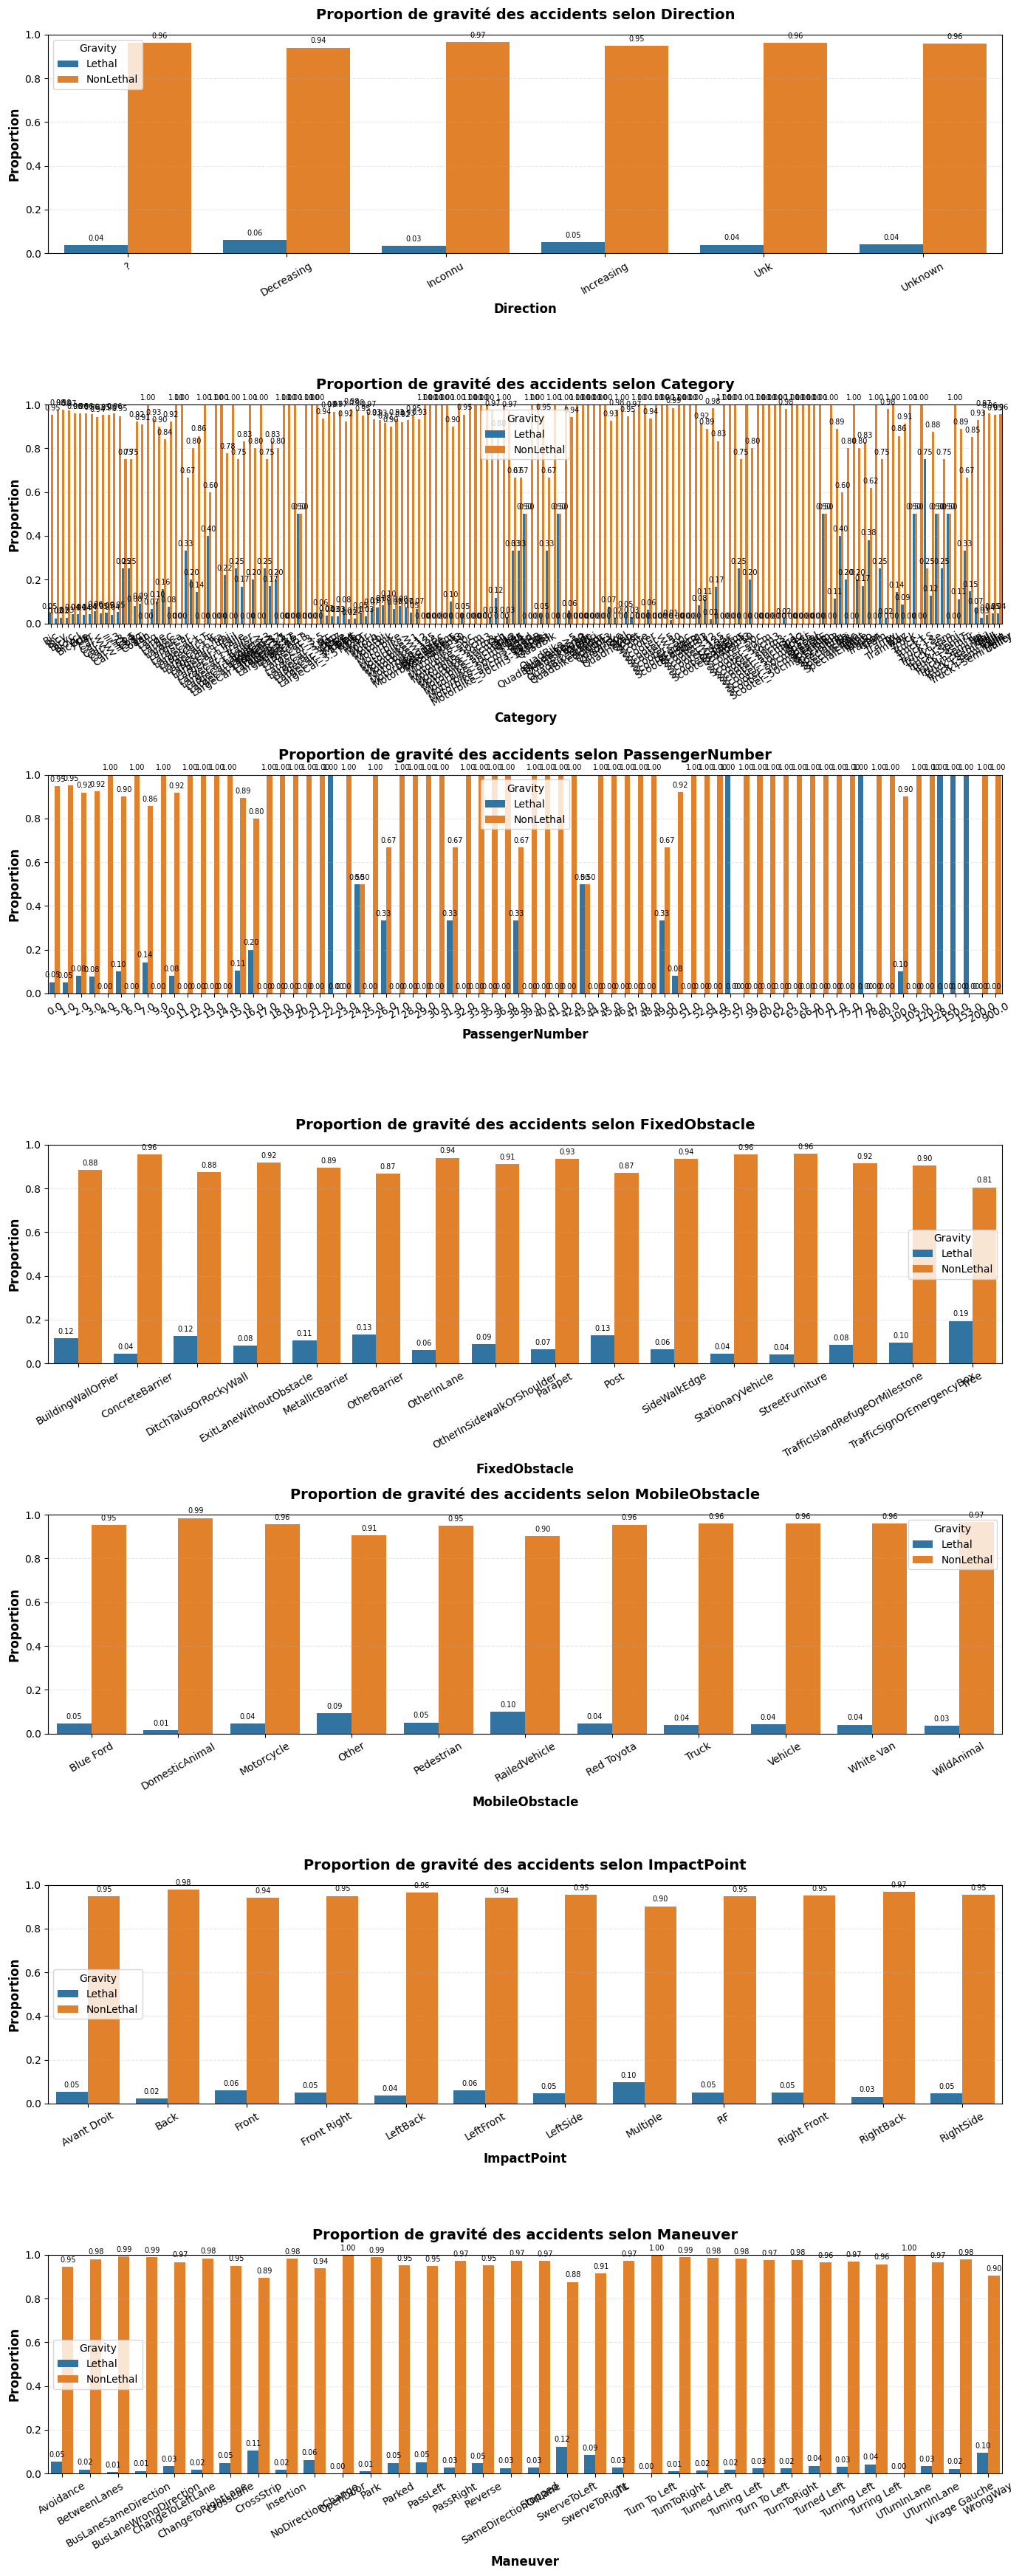

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accidents['AccidentId'] = accidents['AccidentId'].astype(str)
vehicles['AccidentId'] = vehicles['AccidentId'].astype(str)

merged = accidents.merge(vehicles, on='AccidentId', how='left')
merged = merged.dropna(subset=['Gravity'])

cols = ['Direction', 'Category', 'PassengerNumber', 'FixedObstacle', 'MobileObstacle', 'ImpactPoint', 'Maneuver']

fig, axes = plt.subplots(len(cols), 1, figsize=(14, 5 * len(cols)))

for i, c in enumerate(cols):
    prop = (
        merged.groupby([c, 'Gravity'])
        .size()
        .unstack(fill_value=0)
    )
    prop = prop.div(prop.sum(axis=1), axis=0)
    prop = prop.stack().reset_index()
    prop.columns = [c, 'Gravity', 'Proportion']
    sns.barplot(data=prop, x=c, y='Proportion', hue='Gravity', ax=axes[i])
    axes[i].set_title(f'Proportion de gravité des accidents selon {c}', fontsize=14, fontweight='bold', pad=15)
    axes[i].set_xlabel(c, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Proportion', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')
    axes[i].set_ylim(0, 1)
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f', padding=3, fontsize=7)

plt.tight_layout()
plt.show()


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accidents['AccidentId'] = accidents['AccidentId'].astype(str)
vehicles['AccidentId'] = vehicles['AccidentId'].astype(str)
places['AccidentId'] = places['AccidentId'].astype(str)

data = accidents.merge(places, on='AccidentId', how='left')
data = data.merge(vehicles, on='AccidentId', how='left')
data = data.dropna(subset=['Gravity', 'Light_clean', 'Hour'])

data['Hour_num'] = pd.to_datetime(data['Hour'], errors='coerce').dt.hour
data['Hour_num'] = data['Hour_num'].fillna(0).astype(int)

X = data[['Light_clean', 'Hour_num', 'Department', 'InAgglomeration', 
          'IntersectionType', 'Weather', 'CollisionType', 
          'Category', 'PassengerNumber', 'FixedObstacle', 
          'MobileObstacle', 'ImpactPoint', 'Maneuver']]

y = data['Gravity']

cat_features = ['Light_clean', 'Department', 'InAgglomeration', 'IntersectionType',
                'Weather', 'CollisionType', 'Category', 'PassengerNumber',
                'FixedObstacle', 'MobileObstacle', 'ImpactPoint', 'Maneuver']

num_features = ['Hour_num']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        class_weight='balanced'
    ))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("=== Random Forest Performance ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_pred_test):.3f}")
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))
baseline_pred = ["NonLethal"] * len(y_test)

# Accuracy baseline
baseline_acc = accuracy_score(y_test, baseline_pred)

print("=== Baseline vs Modèle ===")
print(f"Always 'NonLethal' Accuracy: {baseline_acc:.3f}")
print(f"Model Test Accuracy:         {accuracy_score(y_test, y_pred_test):.3f}")

print("\nConfusion Matrix (Baseline):\n", confusion_matrix(y_test, baseline_pred))

C:\Users\dgold\AppData\Local\Temp\ipykernel_44552\3867150753.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour_num'] = pd.to_datetime(data['Hour'], errors='coerce').dt.hour


=== Random Forest Performance ===
Train Accuracy: 0.731
Test Accuracy:  0.724

Confusion Matrix (Test):
 [[  630   228]
 [ 4367 11415]]

Classification Report (Test):
               precision    recall  f1-score   support

      Lethal       0.13      0.73      0.22       858
   NonLethal       0.98      0.72      0.83     15782

    accuracy                           0.72     16640
   macro avg       0.55      0.73      0.52     16640
weighted avg       0.94      0.72      0.80     16640

=== Baseline vs Modèle ===
Always 'NonLethal' Accuracy: 0.948
Model Test Accuracy:         0.724

Confusion Matrix (Baseline):
 [[    0   858]
 [    0 15782]]
